# Übung 7

## 1 Diskretes Dynamische System einer (Vor-)Stadtbevölkerung

Eigenwerte: [1.  0.7]
Eigenvektoren:
[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


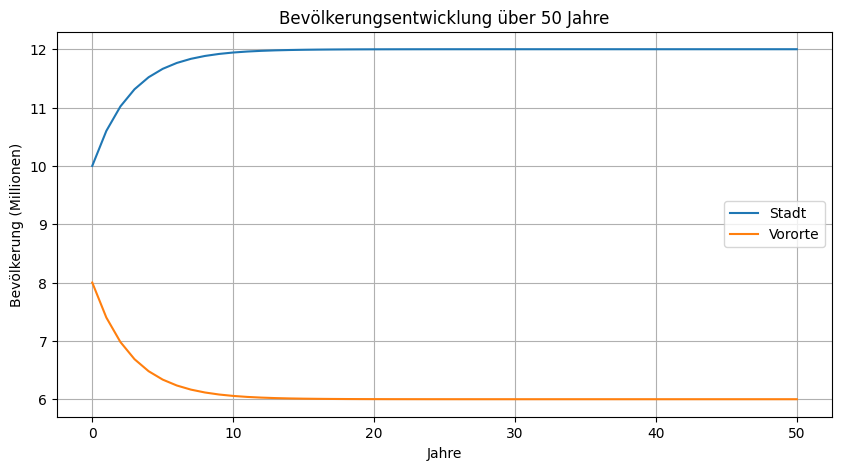

Koeffizienten in Eigenvektorbasis: [13.41640786  2.82842712]
Langzeitverhalten Approximation: [12.  6.]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Übergangsmatrix
M = np.array([[0.9, 0.2], [0.1, 0.8]])

# 3.1 Eigenwerte und Eigenvektoren berechnen
eigenvalues, eigenvectors = np.linalg.eig(M)
print("Eigenwerte:", eigenvalues)
print("Eigenvektoren:")
print(eigenvectors)

# 3.2 Simulation für 50 Jahre
x0 = np.array([10, 8])
years = 50
population = np.zeros((years+1, 2))
population[0] = x0

for t in range(years):
    population[t+1] = M @ population[t]

# Grafische Darstellung
plt.figure(figsize=(10, 5))
plt.plot(population[:, 0], label='Stadt')
plt.plot(population[:, 1], label='Vororte')
plt.xlabel('Jahre')
plt.ylabel('Bevölkerung (Millionen)')
plt.title('Bevölkerungsentwicklung über 50 Jahre')
plt.legend()
plt.grid()
plt.show()

# 3.3 Darstellung in Eigenvektorbasis
# Normalisierte Eigenvektoren (da np.linalg.eig normierte EV liefert)
v1 = eigenvectors[:, 0]
v2 = eigenvectors[:, 1]

# Koeffizienten der Anfangszustands in EV-Basis
c = np.linalg.inv(eigenvectors) @ x0

print("Koeffizienten in Eigenvektorbasis:", c)

# Langzeitverhalten: Nur der Anteil des Eigenvektors zum Eigenwert 1 bleibt
long_term = c[0] * v1 * (1.0**years)  # λ₁^50 ≈ 1^50 = 1
print("Langzeitverhalten Approximation:", long_term)

## 2 Ein Räuber-Beute-System

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Übergangsmatrix
M = np.array([[0.5, 0.4], [-0.104, 1.1]])

# Eigenwerte und Eigenvektoren berechnen
eigenvalues, eigenvectors = np.linalg.eig(M)

# Eigenvektoren skalieren (erste Komponente = 1)
v1 = eigenvectors[:,0]/eigenvectors[0,0]
v2 = eigenvectors[:,1]/eigenvectors[0,1]

print("Eigenwerte:", eigenvalues)
print("Eigenvektor zu λ1:", v1)
print("Eigenvektor zu λ2:", v2)

Eigenwerte: [0.58 1.02]
Eigenvektor zu λ1: [1.  0.2]
Eigenvektor zu λ2: [1.  1.3]


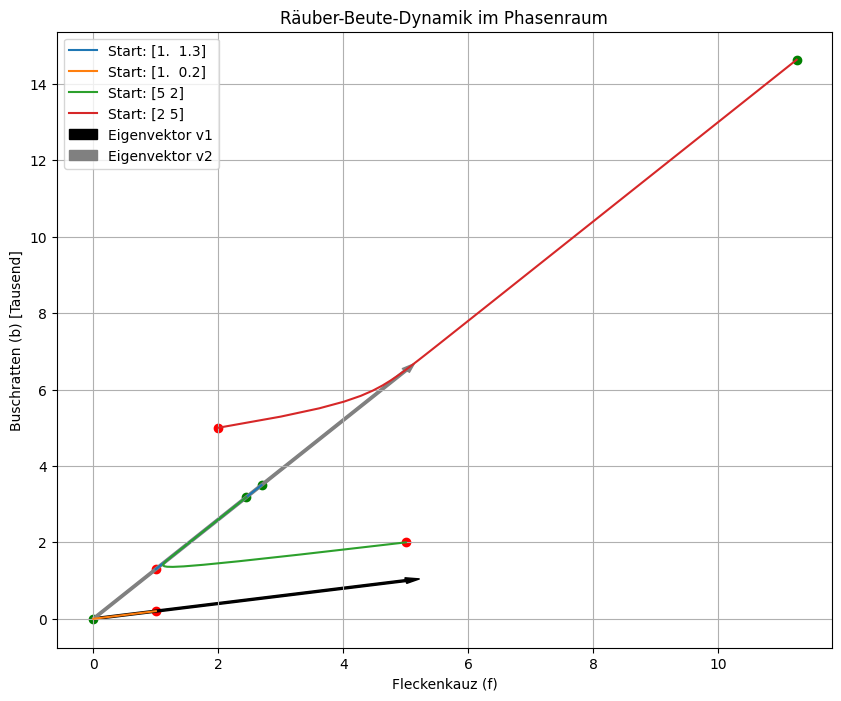

In [4]:
# Funktion für die Simulation
def simulate_system(M, initial_conditions, months):
    results = np.zeros((months+1, 2))
    results[0] = initial_conditions
    for t in range(months):
        results[t+1] = M @ results[t]
    return results

# Verschiedene Anfangsbedingungen
initial_conditions = [
    np.array([1, 1.3]),   # Eigenvektorrichtung
    np.array([1, 0.2]),   # Andere Richtung
    np.array([5, 2]),     # Beliebig
    np.array([2, 5])      # Beliebig
]

# Simulation und Plot
plt.figure(figsize=(10, 8))
for x0 in initial_conditions:
    traj = simulate_system(M, x0, 50)
    plt.plot(traj[:,0], traj[:,1], label=f'Start: {x0}')
    plt.scatter(traj[0,0], traj[0,1], color='red')  # Startpunkt
    plt.scatter(traj[-1,0], traj[-1,1], color='green')  # Endpunkt

# Eigenvektoren einzeichnen
plt.arrow(0, 0, 5*v1[0], 5*v1[1], color='black', width=0.05, label='Eigenvektor v1')
plt.arrow(0, 0, 5*v2[0], 5*v2[1], color='gray', width=0.05, label='Eigenvektor v2')

plt.xlabel('Fleckenkauz (f)')
plt.ylabel('Buschratten (b) [Tausend]')
plt.title('Räuber-Beute-Dynamik im Phasenraum')
plt.legend()
plt.grid()
plt.show()

##  3 Müllmengen

Optimale Parameter: a = -19216.7, b = 9.825


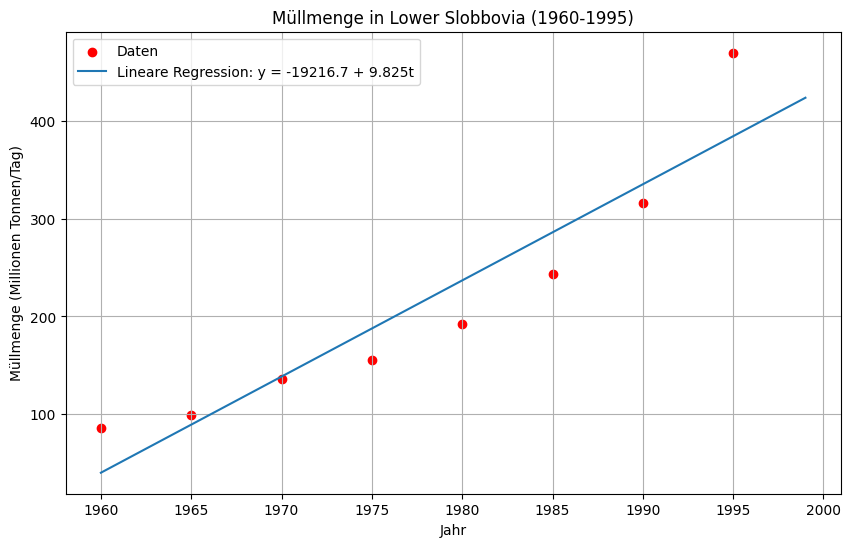

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Daten
years = np.array([1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995])
y = np.array([86.0, 99.8, 135.8, 155.0, 192.6, 243.1, 316.3, 469.5])

# Designmatrix X
X = np.column_stack([np.ones_like(years), years])

# OLS-Lösung
theta = np.linalg.inv(X.T @ X) @ X.T @ y
a, b = theta

print(f"Optimale Parameter: a = {a:.1f}, b = {b:.3f}")

# Vorhersage
years_ext = np.arange(1960, 2000)
y_pred = a + b*years_ext

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(years, y, color='red', label='Daten')
plt.plot(years_ext, y_pred, label=f'Lineare Regression: y = {a:.1f} + {b:.3f}t')
plt.xlabel('Jahr')
plt.ylabel('Müllmenge (Millionen Tonnen/Tag)')
plt.title('Müllmenge in Lower Slobbovia (1960-1995)')
plt.legend()
plt.grid()
plt.show()

## 4 Ohmsches Gesetz

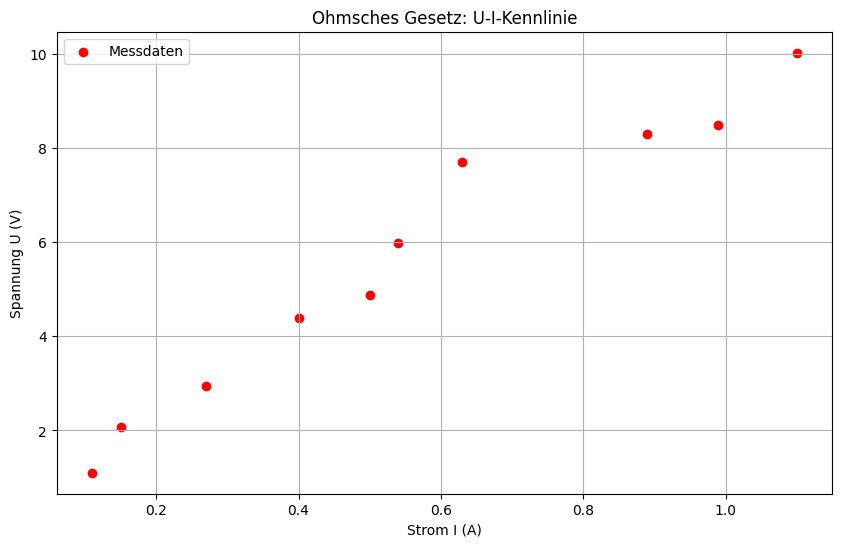

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Messdaten
I = np.array([0.11, 0.15, 0.27, 0.40, 0.50, 0.54, 0.63, 0.89, 0.99, 1.10])  # Strom in A
U = np.array([1.10, 2.08, 2.94, 4.39, 4.87, 5.99, 7.70, 8.30, 8.50, 10.03])  # Spannung in V

plt.figure(figsize=(10, 6))
plt.scatter(I, U, color='red', label='Messdaten')
plt.xlabel('Strom I (A)')
plt.ylabel('Spannung U (V)')
plt.title('Ohmsches Gesetz: U-I-Kennlinie')
plt.grid()
plt.legend()
plt.show()

Schätzung R (U-Fehler): 9.63 Ohm


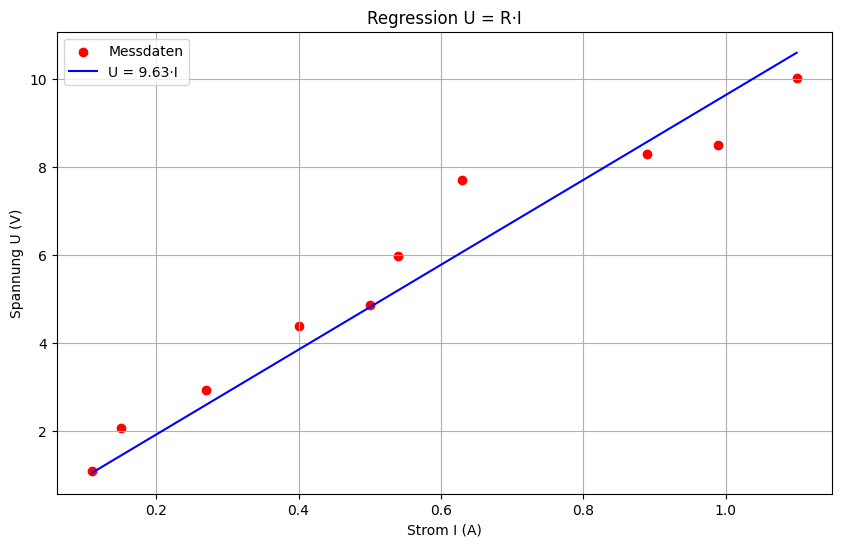

In [8]:
# Designmatrix für U = R·I
X = I.reshape(-1, 1)

# Lineare Regression (minimiert Fehler in U)
R_U, _, _, _ = np.linalg.lstsq(X, U, rcond=None)
print(f"Schätzung R (U-Fehler): {R_U[0]:.2f} Ohm")

# Plot mit Regressionsgerade
plt.figure(figsize=(10, 6))
plt.scatter(I, U, color='red', label='Messdaten')
plt.plot(I, R_U[0]*I, 'b-', label=f'U = {R_U[0]:.2f}·I')
plt.xlabel('Strom I (A)')
plt.ylabel('Spannung U (V)')
plt.title('Regression U = R·I')
plt.grid()
plt.legend()
plt.show()

Schätzung R (I-Fehler): 9.77 Ohm


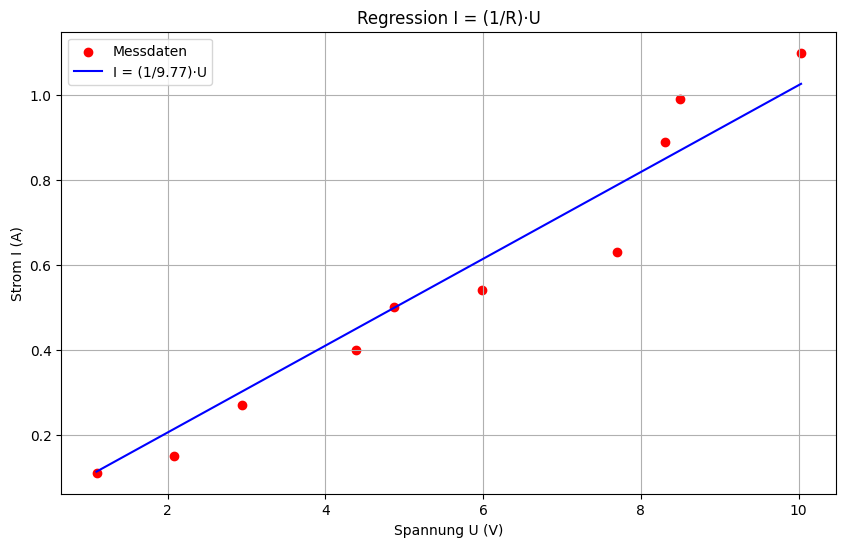

In [9]:
# Designmatrix für I = (1/R)·U
X = U.reshape(-1, 1)

# Lineare Regression (minimiert Fehler in I)
inv_R_I, _, _, _ = np.linalg.lstsq(X, I, rcond=None)
R_I = 1/inv_R_I[0]
print(f"Schätzung R (I-Fehler): {R_I:.2f} Ohm")

# Plot mit Regressionsgerade
plt.figure(figsize=(10, 6))
plt.scatter(U, I, color='red', label='Messdaten')
plt.plot(U, (1/R_I)*U, 'b-', label=f'I = (1/{R_I:.2f})·U')
plt.ylabel('Strom I (A)')
plt.xlabel('Spannung U (V)')
plt.title('Regression I = (1/R)·U')
plt.grid()
plt.legend()
plt.show()

## Übungsstunde

In [17]:
import numpy as np

A = np.array([[2,3,-1],
             [1,0,-1],
             [3,3,-2],
             [0,3,4]])

b = np.array([[3],
             [2],
             [5],
             [0]])

Arank = np.linalg.matrix_rank(A)
print(Arank)
Ab = np.hstack((A,b))
Abrank = np.linalg.matrix_rank(Ab)
print(Abrank)
np.linalg.lstsq(A,b)

3
3


(array([[ 2.33333333],
        [-0.44444444],
        [ 0.33333333]]),
 array([6.03971631e-31]),
 np.int32(3),
 array([6.1082391 , 5.04314762, 0.50604068]))

In [27]:
C = np.array([[2,3,-1],
              [1,0,-1],
              [0,3,4]])

d = np.array([[0],
              [0],
              [0]])
Crank = np.linalg.matrix_rank(C)
print(Crank)
Cdrank =np.linalg.matrix_rank(np.hstack((C,d)))
print(Cdrank)
np.linalg.solve(C,d)
np.linalg.lstsq(C,d)

3
3


(array([[0.],
        [0.],
        [0.]]),
 array([], dtype=float64),
 np.int32(3),
 array([5.21775518, 3.68178598, 0.46848994]))

In [31]:
D=np.array([[2,3,-1],
           [1,0,-1],
           [3,3,-2],
           [0,3,4]])
e = np.array([[2],[2],[4],[0]])
np.linalg.lstsq(D,e)
#np.linalg.solve(D,e)

(array([[ 2.66666667],
        [-0.88888889],
        [ 0.66666667]]),
 array([3.08148791e-31]),
 np.int32(3),
 array([6.1082391 , 5.04314762, 0.50604068]))

In [ ]:
lbd = 2
A = np.array([2,3,-1])
B = np.array([[3],
              [2],
              [5]])
C = np.array([[1,3,-1],
              [1,0,-1],
              [0,3,5]])
D = np.array([[2,3,-1],
              [1,0,-1]])

AB = np.add(A,B)
print(AB)
BA = np.add(B,A)
print(BA)
Ctrans = np.transpose(C)
cinvlbd = (np.invert(C))*lbd
Dtrans = np.transpose(D)
Blbd = B*lbd
Lsg = np.add(Blbd,A)

[[5 6 2]
 [4 5 1]
 [7 8 4]]
[[5 6 2]
 [4 5 1]
 [7 8 4]]


TypeError: add() takes from 2 to 3 positional arguments but 6 were given